Submission Details: This homework problem set consists of 2 problems. Use the PDF as a reference for the questions. All solutions (in Python Notebook, **LastName_FirstName_Assignment2.ipynb**) should be submitted via CANVAS before the deadline (**10 Feb 2023 at 01:00 PM**).

*Best Coding Practices:*


*   Having Proper Comments and Documentation
*   Proper Naming of Variables, Classes, Functions and Modules


# Question 1 (Data setup & Regression - 14 points):

Use the “california housing train” dataset (located in the sample data folder on Colab) to complete the following tasks or answer the following
questions.

In [ ]:
# Importing the necessary Python Packages
import pandas as pd  # Data Manipulation
import numpy as np  # Numerical Operations
from sklearn.model_selection import train_test_split  # Train/Test Split Strategy
import matplotlib.pyplot as plt # Visualization
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# Importing the dataset (csv file)
df = pd.read_csv('california_housing_train.csv')

Describe the dataset. What is the sample size? How many variables are there? What is the mean of the households variable? What is the standard deviation of the variable population? What does the standard deviation mean in this case? (5 points)

In [ ]:
# ANSWER: There are 17000 observations in the dataset and 9 variables. The mean of the households variable is
## 501.2219411764706. The standard deviation of the population variable is 1147.852959. In this case, it means that 
## 68% of population counts are between around 282 and and around 2,756. More broadly, it represents the increments
## in which indicate how much of the data is within a certain percentage.

In [ ]:
df.head() #shows first 5 rows of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.info() #gives good initial information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df['households'].mean() #gives the mean of the indexed variable

501.2219411764706

In [ ]:
df['population'].describe() #gives descriptive statistics of the indexed variable

count    17000.000000
mean      1429.573941
std       1147.852959
min          3.000000
25%        790.000000
50%       1167.000000
75%       1721.000000
max      35682.000000
Name: population, dtype: float64

Create a binary variable in integer form from the variable median house value with 1 indicating above the median and 0 indicating at or below the median. (1 point)

In [ ]:
df['median_house_value'].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
house_value_median = 180400 # assigning the median to a name
df['above_median_house_value'] = np.where(df['median_house_value'] >= house_value_median, 1, 0) # creating a new variable in df,
## using the np.where function to convert it to binary based on comparison to the median value
df['above_median_house_value'].describe() #checking presence of 0s and 1s in new variable

count    17000.000000
mean         0.500118
std          0.500015
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: above_median_house_value, dtype: float64

What percent of the sample has above the median house values? (1 point)

In [ ]:
# Summing the number of observations in each binary category in our new variable.
print("Number of observations above median house values: ", (df["above_median_house_value"] == 1).sum())
print("Number of observations below median house values: ", (df["above_median_house_value"] == 0).sum())

#Finding the percentage above the median house value in comparison to the rest of the dataframe.
percent_above_median = ((df["above_median_house_value"] == 1).sum()/17000)
print("The percent of the sample above the median house values: ", (percent_above_median*100),"%. ")

Number of observations above median house values:  8502
Number of observations below median house values:  8498
The percent of the sample above the median house values:  50.01176470588236 %. 


Build a multiple linear regression model. Choose appropriate dependent and independent variables. (3 points)

In [ ]:
# Independent variables
X = df[['median_income', 'housing_median_age']]

X = sm.add_constant(X) # default line
# Dependent variable
y = df['total_bedrooms']

multi_reg = sm.OLS(y, X).fit()

# performing the summary to list all the parameters of the regression line fitted
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:         total_bedrooms   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     1000.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:34:22   Log-Likelihood:            -1.2592e+05
No. Observations:               17000   AIC:                         2.518e+05
Df Residuals:                   16997   BIC:                         2.519e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                895.9197     10

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Explain the coding implementation. Interpret the coefficients in descriptive sentences. (2 points)

In [ ]:
## The coefficients are a representation of the estimated & predicted change in the dependent vairables, 
## which in this situation are median income and housing median age. The negative coeffienct for median income
## is indicative of an inverse relationship; for each unit increase in median income, there will be a decrease in 
## the number of bedrooms by 11.3391. The negative coeffienct for housing median age
## is indicative of an inverse relationship; for each unit increase in median housing age, there will be a decrease in 
## the number of bedrooms by 10.9297. 

Explain two additional things about the output that are not regression coefficients. (2 points)

In [ ]:
## Looking at the R-squared value -- which measures the fitness of the model, we can see
## that value is 0.105. This is a low R-squared value, which indicates worse fitness, indicating
## that this may not be the model best suited in explaining these variables.

## The p-values for both coefficients are 0.00. Small p-values are indicated of statistical significance usually,
## which in this case allows us to know that both the median income and median housing age are statistically significant
## in determining the number of bedrooms in a house.

# Question 2 (Matplotlib - 6 points): 

Using the Maternal Health Risk Dataset (provided in the lecture resources folder), create the following data visualizations. You will likely need to consult the documentation for matplotlib.

In [ ]:
# Importing the necessary Python Packages
## packages were imported at the start of the notebook

# Importing the dataset (csv file)
# your code here
mhr_df = pd.read_csv('Maternal Health Risk Dataset.csv')

In [ ]:
mhr_df.columns #finding column names

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

Make a histogram of age with 25 bins of age, change the color of the histogram bars to grey, and title the histogram. (2 points)

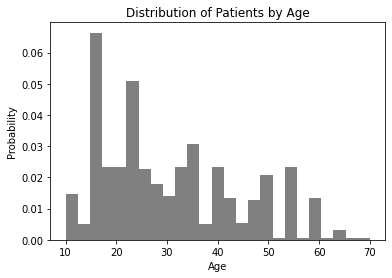

In [ ]:
#Assigning x to Age variable
x = mhr_df['Age']

#the actual histogram 
plt.hist(x, density=True, bins=25, color = 'grey')  

#Labels
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title('Distribution of Patients by Age')
plt.colorbar

plt.show()


Make a simple scatterplot of age and systolicBP. Ensure that the x and y variables are on the correct axes. Change the color of the points to yellow and the shape of the points to triangles. (2 points)

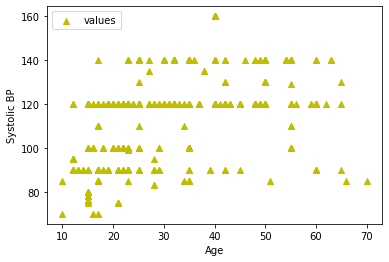

In [ ]:
# x-axis values
x = mhr_df['Age']
# Y-axis values
y = mhr_df['SystolicBP']

plt.scatter(x, y, c="y", marker='^', label="values")

# Labels
plt.ylabel("Systolic BP")
plt.xlabel('Age')


# legend using labels
plt.legend(loc='upper left') # loc - location


# function to show the plot
plt.show()

Make a bar chart of two variables. Label the axes. Change the color of the bars to another color. (2 points)

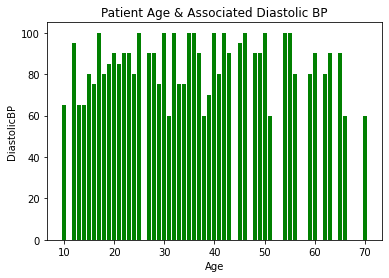

In [ ]:
# x-axis values
x = mhr_df["Age"]

# Y-axis values
y = mhr_df["DiastolicBP"]
# Function to plot
plt.bar(x, y, color='green')


# Labels
plt.ylabel('DiastolicBP')
plt.xlabel('Age')


# Title for the plot
plt.title('Patient Age & Associated Diastolic BP')
# function to show the plot
plt.show()
